# Case Study 2: Predicting E-Commerce Product Recommendation Ratings from Reviews 


![](clothing_banner.jpg)

This is a classic NLP problem dealing with data from an e-commerce store focusing on women's clothing. Each record in the dataset is a customer review which consists of the review title, text description and a rating (ranging from 1 - 5) for a product amongst other features

We convert this into a binary classification problem such that a customer recommends a product (label 1) is the rating is > 3 else they do not recommend the product (label 0)

__Main Objective:__ Leverage the review text attributes to predict the recommendation rating (classification)


_Author: Dipanjan (DJ) Sarkar_

# Load up basic dependencies

In [1]:
import numpy as np
import pandas as pd
import model_evaluation_utils as meu

# Load and View the Dataset

The data is available at https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews from where you can download it.

You can also access it from my [__GitHub Repo__](https://github.com/dipanjanS/feature_engineering_session_dhs18) if needed.

We recommend using the kaggle API and the following command via CLI to get it.

__`kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews`__

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', keep_default_na=False)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Basic Data Processing

- Merge all review text attributes (title, text description) into one attribute
- Convert the 5-star rating system into a binary recommendation rating of 1 or 0

In [3]:
df['Review'] = (df['Title'].map(str) +' '+ df['Review Text']).apply(lambda row: row.strip())
df['Rating'] = [1 if rating > 3 else 0 for rating in df['Rating']]
df = df[['Review', 'Rating']]
df.head()

,Review,Rating
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,Some major design flaws I had such high hopes ...,0
3,"My favorite buy! I love, love, love this jumps...",1
4,Flattering shirt This shirt is very flattering...,1


## Remove all records with no review text

In [4]:
df = df[df['Review'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22642 entries, 0 to 23485
Data columns (total 2 columns):
Review    22642 non-null object
Rating    22642 non-null int64
dtypes: int64(1), object(1)
memory usage: 530.7+ KB


## There is some imbalance in the data based on product ratings

In [5]:
df['Rating'].value_counts()

1    17449
0     5193
Name: Rating, dtype: int64

# Build train and test datasets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Review']], df['Rating'])
X_train.shape, X_test.shape

((16981, 1), (5661, 1))

In [7]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({1: 13064, 0: 3917}), Counter({1: 4385, 0: 1276}))

# Experiment 1: Basic NLP Count based Features

A number of basic text based features can also be created which sometimes are helpful for improving text classification models. 
Some examples are:

- __Word Count:__ total number of words in the documents
- __Character Count:__ total number of characters in the documents
- __Average Word Density:__ average length of the words used in the documents
- __Puncutation Count:__ total number of punctuation marks in the documents
- __Upper Case Count:__ total number of upper count words in the documents
- __Title Word Count:__ total number of proper case (title) words in the documents

Source: https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

In [8]:
import string

X_train['char_count'] = X_train['Review'].apply(len)
X_train['word_count'] = X_train['Review'].apply(lambda x: len(x.split()))
X_train['word_density'] = X_train['char_count'] / (X_train['word_count']+1)
X_train['punctuation_count'] = X_train['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_train['title_word_count'] = X_train['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_train['upper_case_word_count'] = X_train['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


X_test['char_count'] = X_test['Review'].apply(len)
X_test['word_count'] = X_test['Review'].apply(lambda x: len(x.split()))
X_test['word_density'] = X_test['char_count'] / (X_test['word_count']+1)
X_test['punctuation_count'] = X_test['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_test['title_word_count'] = X_test['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_test['upper_case_word_count'] = X_test['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [9]:
X_train.head()

,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
23265,Love these pants!! I rarely order pants on lin...,519,105,4.896226,24,2,1
7775,"Stunning, but fabric is too thin The colors on...",251,46,5.340426,10,2,0
10986,Not quite what i expected While i wanted to lo...,332,63,5.187500,7,2,0
17545,Adorable Truly. adorable. as other reviewers h...,196,34,5.600000,7,2,0
8642,Great shirts I bought one of each color. love ...,513,102,4.980583,25,2,1


## Training a Logistic Regression Model 

A logistic regression model is easy to train, interpret and works well on a wide variety of NLP problems

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=42)

## Model Evaluation Metrics - Quick Refresher

Just accuracy is never enough in datasets with a rare class problem.

- __Precision:__ The positive predictive power of a model. Out of all the predictions made by a model for a class, how many are actually correct
- __Recall:__ The coverage or hit-rate of a model. Out of all the test data samples belonging to a class, how many was the model able to predict (hit or cover) correctly.
- __F1-score:__ The harmonic mean of the precision and recall

Do check out ROC Curve, AUC Score and PR Curve also

In [11]:
lr.fit(X_train.drop(['Review'], axis=1), y_train)
predictions = lr.predict(X_test.drop(['Review'], axis=1))
meu.display_classification_report(true_labels=y_test, predicted_labels=predictions)

             precision    recall  f1-score   support

          1       0.77      1.00      0.87      4385
          0       0.00      0.00      0.00      1276

avg / total       0.60      0.77      0.68      5661



/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like our model was not able to predict a single product having a bad (no recommendation) rating, i.e. __Class 0__. 

This is as good as someone predicting a __1__ or __good__ for every product review. 

Can we do better?

# Experiment 2: NLP Count based features on Parts of Speech Tags

This leverages Parts of Speech (POS) Tagging for text data and counting the total instances of the major parts of speech.
Some examples are:

- __Noun Count__
- __Verb Count__
- __Adjective Count__
- __Adverb Count__
- __Pronoun Count__

Source: https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

In [12]:
import textblob
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' :  ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

X_train['noun_count'] = X_train['Review'].apply(lambda x: check_pos_tag(x, 'noun'))
X_train['verb_count'] = X_train['Review'].apply(lambda x: check_pos_tag(x, 'verb'))
X_train['adj_count'] = X_train['Review'].apply(lambda x: check_pos_tag(x, 'adj'))
X_train['adv_count'] = X_train['Review'].apply(lambda x: check_pos_tag(x, 'adv'))
X_train['pron_count'] = X_train['Review'].apply(lambda x: check_pos_tag(x, 'pron'))

X_test['noun_count'] = X_test['Review'].apply(lambda x: check_pos_tag(x, 'noun'))
X_test['verb_count'] = X_test['Review'].apply(lambda x: check_pos_tag(x, 'verb'))
X_test['adj_count'] = X_test['Review'].apply(lambda x: check_pos_tag(x, 'adj'))
X_test['adv_count'] = X_test['Review'].apply(lambda x: check_pos_tag(x, 'adv'))
X_test['pron_count'] = X_test['Review'].apply(lambda x: check_pos_tag(x, 'pron'))

## Dropping features from the previous experiment since they didn't help

In [13]:
X_train.drop(['char_count', 'word_count', 'word_density', 
              'punctuation_count', 'title_word_count', 'upper_case_word_count'], axis=1, inplace=True)
X_test.drop(['char_count', 'word_count', 'word_density', 
              'punctuation_count', 'title_word_count', 'upper_case_word_count'], axis=1, inplace=True)

In [14]:
X_train.head()

,Review,noun_count,verb_count,adj_count,adv_count,pron_count
23265,Love these pants!! I rarely order pants on lin...,23,24,10,13,12
7775,"Stunning, but fabric is too thin The colors on...",9,12,4,6,2
10986,Not quite what i expected While i wanted to lo...,17,13,4,7,4
17545,Adorable Truly. adorable. as other reviewers h...,9,5,8,3,1
8642,Great shirts I bought one of each color. love ...,25,21,8,6,7


## Model Training and Evaluation

In [15]:
lr.fit(X_train.drop(['Review'], axis=1), y_train)
predictions = lr.predict(X_test.drop(['Review'], axis=1))
meu.display_classification_report(true_labels=y_test, predicted_labels=predictions)

             precision    recall  f1-score   support

          1       0.78      0.98      0.87      4385
          0       0.46      0.05      0.10      1276

avg / total       0.71      0.77      0.70      5661



Well, looks like we are able to predict __4%__ of the total number of bad or negative rated products now! 

Performance for the good or positive rated products is unchanged and pretty decent but looks like the model is still biased towards predicting every product review as a good, recommended product. 

__F1-Score__ for bad reviews is a mere __7%__

Can we improve on our model?

# Leveraging Text Sentiment

Reviews are pretty subjective, opinionated and people often express stong emotions, feelings. 
This makes it a classic case where the text documents here are a good candidate for extracting sentiment as a feature.

The general expectation is that highly rated and recommended products (__label 1__) should have a __positive__ sentiment and products which are not recommended (__label 0__) should have a __negative__ sentiment.

TextBlob is an excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also an a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. 

- The polarity score is a float within the range [-1.0, 1.0]. 
- The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. 

Perhaps this could be used for getting some new features? Let's look at some basic examples.

Source: https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

In [16]:
textblob.TextBlob('This is an AMAZING pair of Jeans!').sentiment

Sentiment(polarity=0.7500000000000001, subjectivity=0.9)

In [17]:
textblob.TextBlob('I really hated this UGLY T-shirt!!').sentiment

Sentiment(polarity=-0.95, subjectivity=0.85)

Looks like this should help us get features which can distinguish between good and bad products. Let's try it out on our dataset!

# Experiment 3: Features from Sentiment Analysis 

Remember this is unsupervised, lexicon-based sentiment analysis where we don't have any pre-labeled data saying which review migth have a positive or negative sentiment. We use the lexicon to determine this.

In [18]:
x_train_snt_obj = X_train['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj.values]
X_train['Subjectivity'] = [obj.polarity for obj in x_train_snt_obj.values]

x_test_snt_obj = X_test['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj.values]
X_test['Subjectivity'] = [obj.polarity for obj in x_test_snt_obj.values]

In [19]:
X_train.head()

,Review,noun_count,verb_count,adj_count,adv_count,pron_count,Polarity,Subjectivity
23265,Love these pants!! I rarely order pants on lin...,23,24,10,13,12,0.381250,0.381250
7775,"Stunning, but fabric is too thin The colors on...",9,12,4,6,2,0.075000,0.075000
10986,Not quite what i expected While i wanted to lo...,17,13,4,7,4,0.016667,0.016667
17545,Adorable Truly. adorable. as other reviewers h...,9,5,8,3,1,0.288542,0.288542
8642,Great shirts I bought one of each color. love ...,25,21,8,6,7,0.160064,0.160064


## Model Training and Evaluation

In [20]:
lr.fit(X_train.drop(['Review'], axis=1), y_train)
predictions = lr.predict(X_test.drop(['Review'], axis=1))
meu.display_classification_report(true_labels=y_test, predicted_labels=predictions)

             precision    recall  f1-score   support

          1       0.83      0.95      0.88      4385
          0       0.65      0.32      0.43      1276

avg / total       0.79      0.81      0.78      5661



Interesting! Looks like we are now able to predict __34%__ of the total number of bad or negative rated products now! 
Precision is quite good at __71%__

__F1-Score__ for bad reviews is now __46%__ and good reviews is __89%__

This brings our overall __F1-Score__ to __79%__ which is quite good.

Can we still improve on our model since the recall of bad reviews is still pretty low?

# Text Pre-processing and Wrangling

We want to extract some specific features based on standard NLP feature engineering models like the classic Bag of Words model.
For this we need to clean and pre-process our text data. We will build a simple text pre-processor here since the main intent is to look at feature engineering strategies.

We will focus on:
- Text Lowercasing
- Removal of contractions
- Removing unnecessary characters, numbers and symbols
- Stemming
- Stopword removal

Source: https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

In [21]:
import contractions

contractions.fix('I didn\'t like this t-shirt')

'I did not like this t-shirt'

In [22]:
import nltk
import contractions
import re

# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

# load up a simple porter stemmer - nothing fancy
ps = nltk.porter.PorterStemmer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming
    document = ' '.join([ps.stem(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

stp = np.vectorize(simple_text_preprocessor)

In [23]:
X_train['Clean Review'] = stp(X_train['Review'].values)
X_test['Clean Review'] = stp(X_test['Review'].values)

X_train.head()

,Review,noun_count,verb_count,adj_count,adv_count,pron_count,Polarity,Subjectivity,Clean Review
23265,Love these pants!! I rarely order pants on lin...,23,24,10,13,12,0.381250,0.381250,love pant rare order pant line size often vari...
7775,"Stunning, but fabric is too thin The colors on...",9,12,4,6,2,0.075000,0.075000,stun but fabric thin color thi kimono amaz rea...
10986,Not quite what i expected While i wanted to lo...,17,13,4,7,4,0.016667,0.016667,not quit expect want love thi dress not like s...
17545,Adorable Truly. adorable. as other reviewers h...,9,5,8,3,1,0.288542,0.288542,ador truli ador review mention much better per...
8642,Great shirts I bought one of each color. love ...,25,21,8,6,7,0.160064,0.160064,great shirt bought one color love fit well ver...


## Extracting out the structured features from previous experiments

In [24]:
X_train_metadata = X_train.drop(['Review', 'Clean Review'], axis=1).reset_index(drop=True)
X_test_metadata = X_test.drop(['Review', 'Clean Review'], axis=1).reset_index(drop=True)

X_train_metadata.head()

,noun_count,verb_count,adj_count,adv_count,pron_count,Polarity,Subjectivity
0,23,24,10,13,12,0.381250,0.381250
1,9,12,4,6,2,0.075000,0.075000
2,17,13,4,7,4,0.016667,0.016667
3,9,5,8,3,1,0.288542,0.288542
4,25,21,8,6,7,0.160064,0.160064


# Experiment 4: Adding Bag of Words based Features - 1-grams

This is perhaps the most simple vector space representational model for unstructured text. A vector space model is simply a mathematical model to represent unstructured text (or any other data) as numeric vectors, such that each dimension of the vector is a specific feature\attribute. 

The bag of words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0) or even weighted values. 

The model’s name is such because each document is represented literally as a ‘bag’ of its own words, disregarding word orders, sequences and grammar.

Source: https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1, 1))
X_traincv = cv.fit_transform(X_train['Clean Review']).toarray()
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test['Clean Review']).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())
X_traincv.head()

,aa,aaaaaaamaz,aaaaandido,aaaaannnnnnd,aaaah,aaaahmaz,aaah,aam,ab,abbey,...,zipper,zipperi,zippi,zoe,zombi,zone,zooland,zoom,zowi,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train_comb = pd.concat([X_train_metadata, X_traincv], axis=1)
X_test_comb = pd.concat([X_test_metadata, X_testcv], axis=1)

X_train_comb.head()

,noun_count,verb_count,adj_count,adv_count,pron_count,Polarity,Subjectivity,aa,aaaaaaamaz,aaaaandido,...,zipper,zipperi,zippi,zoe,zombi,zone,zooland,zoom,zowi,zuma
0,23,24,10,13,12,0.381250,0.381250,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,12,4,6,2,0.075000,0.075000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17,13,4,7,4,0.016667,0.016667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,5,8,3,1,0.288542,0.288542,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,21,8,6,7,0.160064,0.160064,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Training and Evaluation

In [27]:
lr.fit(X_train_comb, y_train)
predictions = lr.predict(X_test_comb)
meu.display_classification_report(true_labels=y_test, predicted_labels=predictions)

             precision    recall  f1-score   support

          1       0.91      0.95      0.93      4385
          0       0.79      0.69      0.74      1276

avg / total       0.88      0.89      0.89      5661



Wow! This looks promising.

We are now able to predict __71%__ of the total number of bad or negative rated products now! 
Precision is quite good at __77%__

__F1-Score__ for bad reviews is now __74%__ and good reviews is __93%__

This brings our overall __F1-Score__ to __88%__ which is quite good.

Can we still improve on our model? Let's look at n-grams!

# Experiment 5: Adding Bag of Words based Features - 2-grams

We use the same feature engineering technique here except we consider both 1 and 2-grams as our features. 
We also do some basic filtering like removing terms which might occur only once or almost in every document!

In [28]:
cv = CountVectorizer(min_df=2, max_df=0.99, ngram_range=(1, 2))
X_traincv = cv.fit_transform(X_train['Clean Review']).toarray()
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test['Clean Review']).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())
X_traincv.head()

,aa,aa waist,ab,abdomen,abil,abil dress,abil go,abl,abl bend,abl but,...,zipper top,zipper tri,zipper veri,zipper wa,zipper well,zipper work,zipper would,zone,zoom,zoom close
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train_comb = pd.concat([X_train_metadata, X_traincv], axis=1)
X_test_comb = pd.concat([X_test_metadata, X_testcv], axis=1)

X_train_comb.head()

,noun_count,verb_count,adj_count,adv_count,pron_count,Polarity,Subjectivity,aa,aa waist,ab,...,zipper top,zipper tri,zipper veri,zipper wa,zipper well,zipper work,zipper would,zone,zoom,zoom close
0,23,24,10,13,12,0.381250,0.381250,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,12,4,6,2,0.075000,0.075000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17,13,4,7,4,0.016667,0.016667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,5,8,3,1,0.288542,0.288542,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,21,8,6,7,0.160064,0.160064,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Training and Evaluation

In [30]:
lr.fit(X_train_comb, y_train)
predictions = lr.predict(X_test_comb)
meu.display_classification_report(true_labels=y_test, predicted_labels=predictions)

             precision    recall  f1-score   support

          1       0.92      0.95      0.93      4385
          0       0.80      0.72      0.76      1276

avg / total       0.89      0.90      0.89      5661



We can see some clear improvements!

We are now able to predict __74%__ of the total number of bad or negative rated products now! 
Precision is quite good at __80%__

__F1-Score__ for bad reviews is now __77%__ and good reviews is __94%__

This brings our overall __F1-Score__ to __90%__ which is excellent!

Do note that introducing n-grams has really exploded our feature space! Can we reduce some of these features and still maintain an equal level of performance?

# Some intelligence feature selection

We plot the CDF of the proportion of words occuring in a specific number of documents to really get an idea of how many features are occuring in how many documents.

This should help us tweak the `__min_df__` or `__max_df__` hyperparameters a bit when doing feature engineering

In [31]:
word_doc_freq = X_traincv.sum(axis=0).transpose().reset_index()
word_doc_freq.columns = ['Word', 'Doc Freq']
word_doc_freq.head(10)

,Word,Doc Freq
0,aa,14
1,aa waist,2
2,ab,5
3,abdomen,4
4,abil,8
5,abil dress,2
6,abil go,2
7,abl,323
8,abl bend,3
9,abl but,2


In [32]:
from collections import Counter

sorted_doc_freqs = np.sort(word_doc_freq['Doc Freq'])
counts = Counter(sorted_doc_freqs)
counts.most_common(10)

[(2, 24991),
 (3, 10833),
 (4, 6000),
 (5, 3803),
 (6, 2673),
 (7, 1890),
 (8, 1443),
 (9, 1160),
 (10, 971),
 (11, 834)]

In [37]:
counts = counts.items()
x_ax = np.array([item[0] for item in counts])
freqs = np.array([item[1] for item in counts])
y_ax = freqs.cumsum() / freqs.cumsum()[-1]

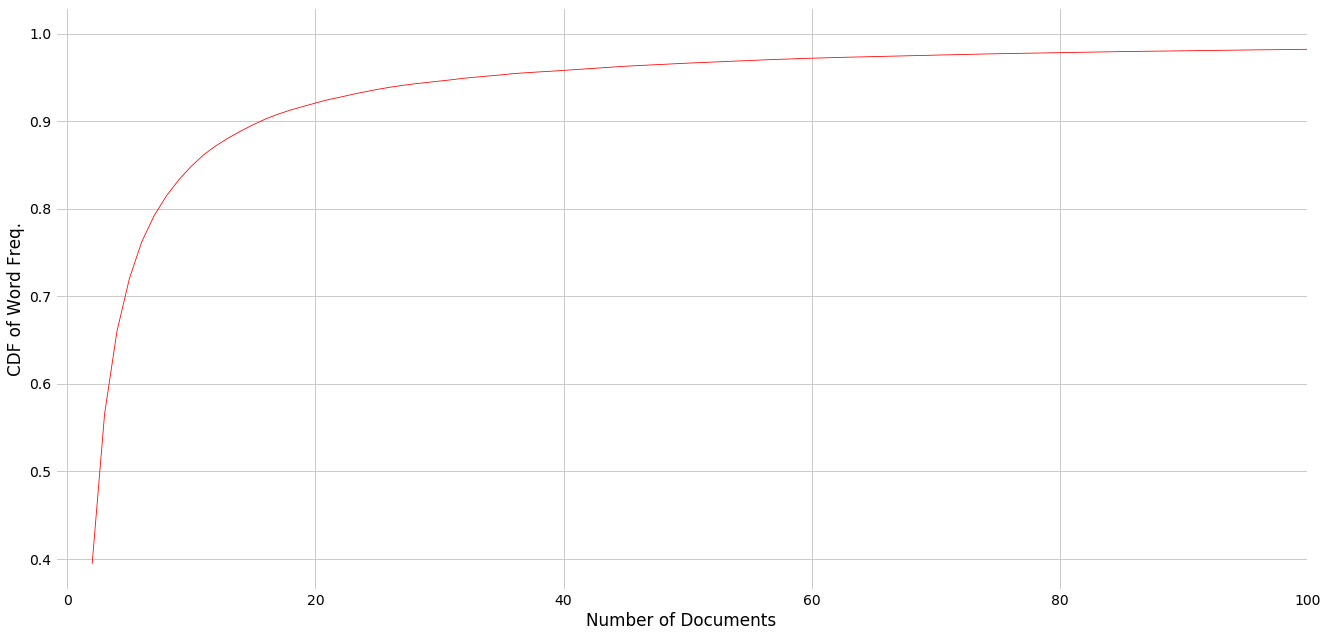

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

fig = plt.figure(facecolor='white', figsize=(20, 10))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='white'

plt.plot(x_ax , y_ax, linewidth=0.8, color='r')

plt.xlim(-1, 100)
_ = plt.xlabel('Number of Documents')
_ = plt.ylabel('CDF of Word Freq.')

# Experiment 6: Adding Bag of Words based Features - 2-grams with Feature Selection

We use the same feature engineering technique here except we consider both 1 and 2-grams as our features. 
We remove words occuring only twice since there seems to be a huge number of such words increasing the feature space

In [39]:
cv = CountVectorizer(min_df=3, max_df=0.99, ngram_range=(1, 2))
X_traincv = cv.fit_transform(X_train['Clean Review']).toarray()
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test['Clean Review']).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())
X_traincv.head()

,aa,ab,abdomen,abil,abl,abl bend,abl button,abl buy,abl dress,abl easili,...,zipper stick,zipper thi,zipper top,zipper tri,zipper veri,zipper wa,zipper work,zipper would,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X_train_comb = pd.concat([X_train_metadata, X_traincv], axis=1)
X_test_comb = pd.concat([X_test_metadata, X_testcv], axis=1)

X_train_comb.head()

,noun_count,verb_count,adj_count,adv_count,pron_count,Polarity,Subjectivity,aa,ab,abdomen,...,zipper stick,zipper thi,zipper top,zipper tri,zipper veri,zipper wa,zipper work,zipper would,zone,zoom
0,23,24,10,13,12,0.381250,0.381250,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,12,4,6,2,0.075000,0.075000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17,13,4,7,4,0.016667,0.016667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,5,8,3,1,0.288542,0.288542,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,21,8,6,7,0.160064,0.160064,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Training and Evaluation

In [41]:
lr.fit(X_train_comb, y_train)
predictions = lr.predict(X_test_comb)
meu.display_classification_report(true_labels=y_test, predicted_labels=predictions)

             precision    recall  f1-score   support

          1       0.92      0.95      0.93      4385
          0       0.80      0.72      0.75      1276

avg / total       0.89      0.90      0.89      5661



We have almost cut down our feature space by half but our overall model performance is still approximately the same which is good!

# Experiment 7: Adding Bag of Words based Features - 3-grams with Feature Selection

We use the same feature engineering technique here except we consider 1, 2 and 3-grams as our features. 
Feature selection is done just like the previous experiments

In [42]:
cv = CountVectorizer(min_df=3, max_df=0.99, ngram_range=(1, 3))
X_traincv = cv.fit_transform(X_train['Clean Review']).toarray()
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test['Clean Review']).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())
X_traincv.head()

,aa,ab,abdomen,abil,abl,abl bend,abl button,abl buy,abl dress,abl easili,...,zipper top,zipper tri,zipper veri,zipper wa,zipper wa not,zipper work,zipper would,zipper would not,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_train_comb = pd.concat([X_train_metadata, X_traincv], axis=1)
X_test_comb = pd.concat([X_test_metadata, X_testcv], axis=1)

X_train_comb.head()

,noun_count,verb_count,adj_count,adv_count,pron_count,Polarity,Subjectivity,aa,ab,abdomen,...,zipper top,zipper tri,zipper veri,zipper wa,zipper wa not,zipper work,zipper would,zipper would not,zone,zoom
0,23,24,10,13,12,0.381250,0.381250,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,12,4,6,2,0.075000,0.075000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17,13,4,7,4,0.016667,0.016667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,5,8,3,1,0.288542,0.288542,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,21,8,6,7,0.160064,0.160064,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Training and Evaluation

In [44]:
lr.fit(X_train_comb, y_train)
predictions = lr.predict(X_test_comb)
meu.display_classification_report(true_labels=y_test, predicted_labels=predictions)

             precision    recall  f1-score   support

          1       0.92      0.95      0.93      4385
          0       0.80      0.72      0.76      1276

avg / total       0.89      0.90      0.90      5661



Looks like a standard peformance like the previous models with maybe a __1%__ increase in precision and recall for the poorly rated products. 

Overall __F1-Score__ remains constant at __90%__

# Future Scope

Try out TF-IDF, word embedding based features, topic model based features, undersampling and oversampling (synthetic sampling), deep learning models and so on!